# A/B Test 2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os

In [ ]:
dataset = os.path.join('datasets','ab_data.csv')
df = pd.read_csv(dataset)
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [137]:
df.shape

(294478, 5)

In [138]:
df['converted'].mean()

np.float64(0.11965919355605512)

In [139]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [140]:
df.query('group == "treatment" and landing_page != "new_page"')

,user_id,timestamp,group,landing_page,converted
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0
...,...,...,...,...,...
293773,688144,2017-01-16 20:34:50.450528,treatment,old_page,1
293817,876037,2017-01-17 16:15:08.957152,treatment,old_page,1
293917,738357,2017-01-05 15:37:55.729133,treatment,old_page,0
294014,813406,2017-01-09 06:25:33.223301,treatment,old_page,0


In [141]:
df.query('group == "control" and landing_page != "old_page"')

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1
850,793580,2017-01-08 03:25:33.723712,control,new_page,1
...,...,...,...,...,...
293894,741581,2017-01-09 20:49:03.391764,control,new_page,0
293996,942612,2017-01-08 13:52:28.182648,control,new_page,0
294200,928506,2017-01-13 21:32:10.491309,control,new_page,0
294253,886135,2017-01-06 12:49:20.509403,control,new_page,0


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [143]:
df2t = df.query('group == "treatment" and landing_page == "new_page"')
df2c = df.query('group == "control" and landing_page == "old_page"')

In [144]:
df2 = df2t.merge(df2c, how='outer')
df2.head()

,user_id,timestamp,group,landing_page,converted
0,630000,2017-01-19 06:26:06.548941,treatment,new_page,0
1,630001,2017-01-16 03:16:42.560309,treatment,new_page,1
2,630002,2017-01-19 19:20:56.438330,control,old_page,0
3,630003,2017-01-12 10:09:31.510471,treatment,new_page,0
4,630004,2017-01-18 20:23:58.824994,treatment,new_page,0


In [145]:
df2.shape

(290585, 5)

In [146]:
df2.describe()

,user_id,converted
count,290585.000000,290585.000000
mean,788004.825246,0.119597
std,91224.582639,0.324490
min,630000.000000,0.000000
25%,709035.000000,0.000000
50%,787995.000000,0.000000
75%,866956.000000,0.000000
max,945999.000000,1.000000


In [147]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

In [148]:
sum(df2['user_id'].duplicated())

1

In [149]:
df2[df2['user_id'].duplicated(keep='first')]

,user_id,timestamp,group,landing_page,converted
131713,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [150]:
df2 = df2[~df2.user_id.duplicated(keep='first')]

In [151]:
df2.nunique()

user_id         290584
timestamp       290584
group                2
landing_page         2
converted            2
dtype: int64

In [152]:
df2.converted.mean() * 100

np.float64(11.959708724499627)

In [153]:
df2_control = df2.query('group == "control"')
df2_treatment = df2.query('group == "treatment"')

In [154]:
df2_control['converted'].mean() * 100

np.float64(12.03863045004612)

In [155]:
df2_treatment['converted'].mean() * 100

np.float64(11.880806551510565)

In [156]:
df2['converted'].mean() * 100

np.float64(11.959708724499627)

In [157]:
1 - df2['converted'].mean()

np.float64(0.8804029127550037)

In [158]:
len(df2_treatment)

145310

In [159]:
new_page_converted = np.random.choice([1, 0], size=len(df2_treatment), p=[df2['converted'].mean(), (1 - df2['converted'].mean())])
new_page_converted

array([0, 0, 0, ..., 0, 1, 0])

In [160]:
old_page_converted = np.random.choice([1, 0], size=len(df2_control), p=[df2['converted'].mean(), (1 - df2['converted'].mean())])
old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

In [161]:
new_page_converted = np.random.binomial(len(df2_treatment), df2.converted.mean(), 10000) / len(df2_treatment)
new_page_converted

array([0.1202739 , 0.12044594, 0.11845021, ..., 0.11869796, 0.11915904,
       0.11860161])

In [162]:
old_page_converted = np.random.binomial(len(df2_control), df2.converted.mean(), 10000) / len(df2_control)
old_page_converted

array([0.11848645, 0.12003524, 0.11975302, ..., 0.11930559, 0.11952586,
       0.12012473])

In [163]:
p_diffs = new_page_converted - old_page_converted
p_diffs

array([ 0.00178745,  0.0004107 , -0.00130281, ..., -0.00060763,
       -0.00036682, -0.00152312])

In [164]:
p_diffs.mean()

np.float64(1.1831956751291176e-05)

In [165]:
ab_data_diff = df2_treatment['converted'].mean() - df2_control['converted'].mean()
ab_data_diff

np.float64(-0.0015782389853555567)

In [166]:
(p_diffs > ab_data_diff).mean() * 100

np.float64(90.46)

In [167]:
(p_diffs < ab_data_diff).mean() * 100

np.float64(9.54)

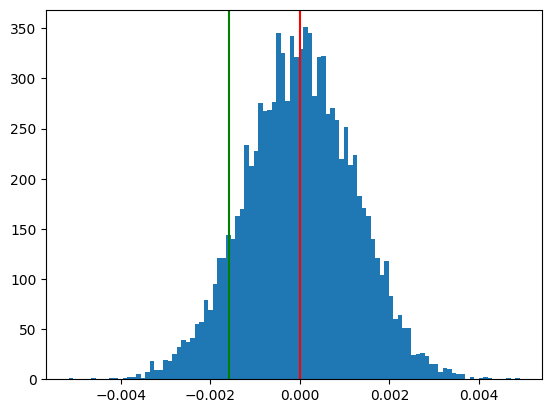

In [168]:
plt.hist(p_diffs, bins=100)
low = ab_data_diff
higth = p_diffs.mean()
plt.axvline(x=low, color='g')
plt.axvline(x=higth, color='r')